In [1]:
!pip install git+https://github.com/netbrainml/nbml.git
from nbml.pytorch import *
from nbml.workshops.cifar100.utils import *
from tqdm import tqdm_notebook as tqdm

  Cloning https://github.com/netbrainml/nbml.git to /tmp/pip-req-build-c60vgvm2
  Running command git clone -q https://github.com/netbrainml/nbml.git /tmp/pip-req-build-c60vgvm2
  Created wheel for nbml: filename=nbml-0.0.1-cp36-none-any.whl size=13124 sha256=4d21557e2a91ff3fb6cded731697130f53422326764e9164a8011f786f5a530b
  Stored in directory: /tmp/pip-ephem-wheel-cache-4uwu5o9u/wheels/3a/b1/27/4431be29eb1fbe8f0912364e44fecc078167c19415ed958b11
Successfully built nbml


Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
x_train, x_test, y_train, y_test = getCIFAR100()
tdl, vdl = torchCIFAR100(x_train, x_test, y_train, y_test, bs=128)

169009152/169001437 [==============================] - 11s 0us/step
arg_0: (50000, 32, 32, 3)
arg_1: (10000, 32, 32, 3)
arg_2: (50000, 1)
arg_3: (10000, 1)
arg_0: torch.Size([50000, 3, 32, 32])
arg_1: torch.Size([10000, 3, 32, 32])
arg_2: torch.Size([50000])
arg_3: torch.Size([10000])


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from fastai.torch_core import Module

class Flatten(Module):
    def __call__(self,x): return torch.flatten(x, start_dim=1)
    
class ConvNet(BasicTrainableClassifier):
    def __init__(self, ni, nc, opt):
        super().__init__(opt=opt)
        self.model = nn.Sequential(nn.Conv2d(ni, 64, 3, 1),
                                   nn.MaxPool2d(2,2),
                                   nn.Conv2d(64, 128, 3, 1),
                                   nn.MaxPool2d(2,2),
                                   nn.Conv2d(128, 256, 3, 1),
                                   nn.AdaptiveMaxPool2d(1),
                                   Flatten(),
                                   nn.Linear(256, nc)
                                  )
    def forward(self,x): return self.model(x)

In [4]:
torch.optim.SGD??

In [5]:
from functools import partial
sgd = ConvNet(3,100,opt=torch.optim.SGD).cuda()
mom = ConvNet(3,100,opt=partial(torch.optim.SGD, momentum=0.9)).cuda()
rms = ConvNet(3,100,opt=torch.optim.RMSprop).cuda()
adam = ConvNet(3,100,opt=torch.optim.Adam).cuda()

In [6]:
sgd.fit(tdl, vdl, cbs=True, epochs=5)
mom.fit(tdl, vdl, cbs=True, epochs=5)
rms.fit(tdl, vdl, cbs=True, epochs=5)
adam.fit(tdl, vdl, cbs=True, epochs=5)

100% (391 of 391) |######################| Elapsed Time: 0:00:03 Time:  0:00:03
100% (391 of 391) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 1:
	Train Loss: 4.606 | Train Acc: 1.00%
	 Val. Loss: 4.606 |  Val. Acc: 0.91%


100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (391 of 391) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 2:
	Train Loss: 4.604 | Train Acc: 1.02%
	 Val. Loss: 4.604 |  Val. Acc: 0.91%


100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (391 of 391) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 3:
	Train Loss: 4.602 | Train Acc: 1.01%
	 Val. Loss: 4.602 |  Val. Acc: 0.97%


100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (391 of 391) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 4:
	Train Loss: 4.601 | Train Acc: 1.03%
	 Val. Loss: 4.601 |  Val. Acc: 1.01%


100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (391 of 391) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 5:
	Train Loss: 4.599 | Train Acc: 1.06%
	 Val. Loss: 4.599 |  Val. Acc: 1.08%


100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (391 of 391) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 1:
	Train Loss: 4.591 | Train Acc: 1.89%
	 Val. Loss: 4.591 |  Val. Acc: 1.93%


100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (391 of 391) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 2:
	Train Loss: 4.557 | Train Acc: 2.81%
	 Val. Loss: 4.557 |  Val. Acc: 2.64%


100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (391 of 391) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 3:
	Train Loss: 4.424 | Train Acc: 3.78%
	 Val. Loss: 4.425 |  Val. Acc: 3.68%


100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (391 of 391) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 4:
	Train Loss: 4.268 | Train Acc: 5.54%
	 Val. Loss: 4.271 |  Val. Acc: 5.40%


100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (391 of 391) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 5:
	Train Loss: 4.154 | Train Acc: 7.62%
	 Val. Loss: 4.165 |  Val. Acc: 7.26%


100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (391 of 391) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 1:
	Train Loss: 3.652 | Train Acc: 14.51%
	 Val. Loss: 3.715 |  Val. Acc: 13.63%


100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (391 of 391) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 2:
	Train Loss: 3.081 | Train Acc: 26.28%
	 Val. Loss: 3.208 |  Val. Acc: 24.05%


100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (391 of 391) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 3:
	Train Loss: 2.714 | Train Acc: 33.29%
	 Val. Loss: 2.935 |  Val. Acc: 28.90%


100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (391 of 391) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 4:
	Train Loss: 2.450 | Train Acc: 38.72%
	 Val. Loss: 2.781 |  Val. Acc: 32.90%


100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (391 of 391) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 5:
	Train Loss: 2.237 | Train Acc: 42.90%
	 Val. Loss: 2.682 |  Val. Acc: 35.09%


100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (391 of 391) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 1:
	Train Loss: 3.197 | Train Acc: 23.98%
	 Val. Loss: 3.267 |  Val. Acc: 22.83%


100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (391 of 391) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 2:
	Train Loss: 2.732 | Train Acc: 32.95%
	 Val. Loss: 2.905 |  Val. Acc: 29.63%


100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (391 of 391) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 3:
	Train Loss: 2.455 | Train Acc: 39.00%
	 Val. Loss: 2.729 |  Val. Acc: 33.47%


100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (391 of 391) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 4:
	Train Loss: 2.206 | Train Acc: 44.63%
	 Val. Loss: 2.588 |  Val. Acc: 36.54%


100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (391 of 391) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 5:
	Train Loss: 2.028 | Train Acc: 48.47%
	 Val. Loss: 2.548 |  Val. Acc: 38.56%


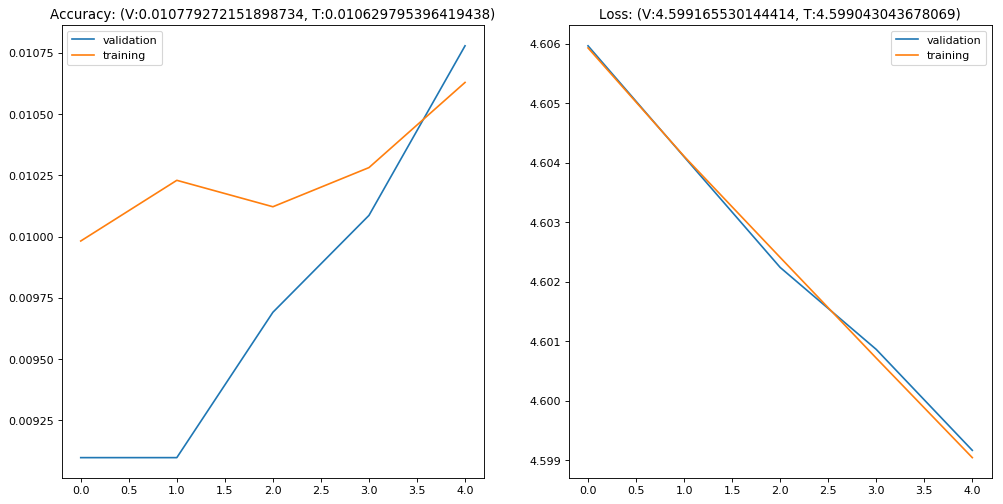

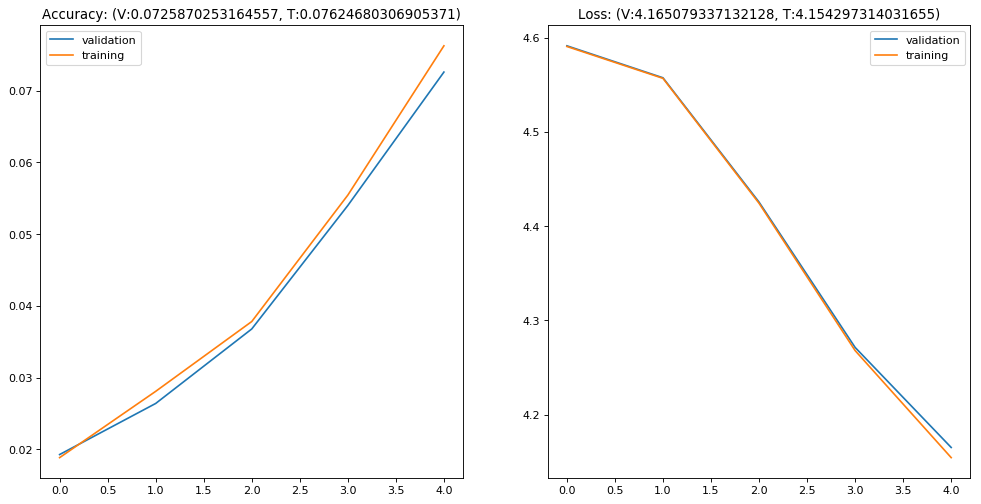

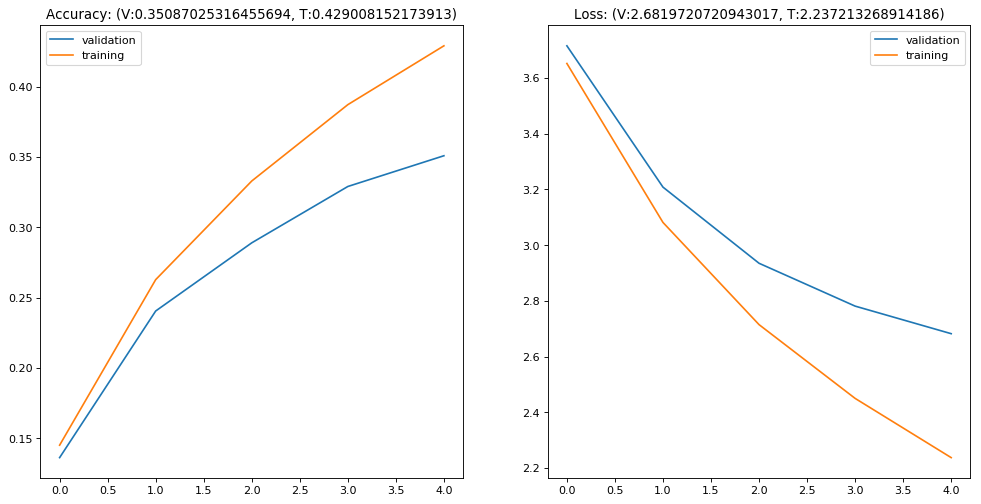

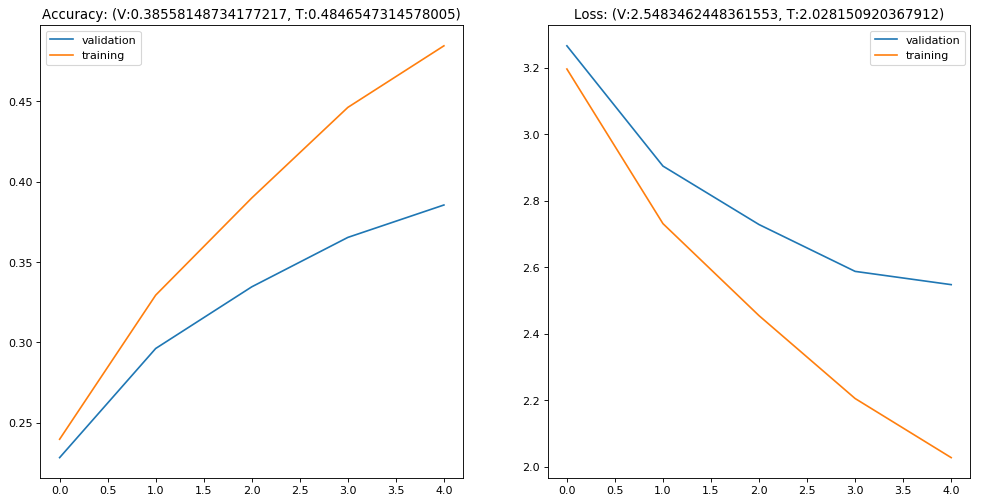

In [7]:
sgd.plot
mom.plot
rms.plot
adam.plot